# Predicting Bank Term Deposit Subscriptions

## Project Overview

### Background
This project focuses on predicting whether a client will subscribe to a term deposit based on their personal and contact information. The dataset originates from a Portuguese banking institution and covers direct marketing campaigns from May 2008 to November 2010.

### Problem Domain
The goal is to use data mining techniques to classify clients based on their likelihood to subscribe to a term deposit.

### Dataset
- **bank.csv:** 10% sample of the dataset with 4,521 instances.
- **bank-full.csv:** Full dataset with 45,211 instances.
- Link dataset: [Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)

## Problem Statement

### Objective
Develop a predictive model to determine if a client will subscribe to a term deposit.

### Strategy
1. Data Exploration
2. Data Preprocessing
3. Model Selection and Training
4. Model Evaluation
5. Refinement

## Metrics

### Performance Metrics
- **Accuracy:** Measures the proportion of correctly classified instances.
- **Precision:** Proportion of positive identifications that were correct.
- **Recall (Sensitivity):** Proportion of actual positives correctly identified.
- **F1-Score:** Harmonic mean of precision and recall.

### Justification
Accuracy gives a broad view of performance, while Precision, Recall, and F1-Score offer deeper insights, especially with imbalanced datasets.

---

## Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv('bank.csv', delimiter=';')

In [4]:
# Display basic information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [5]:
print("\nFirst Few Rows:")
print(data.head())


First Few Rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [6]:
# Describe numerical features
print("\nNumerical Features Description:")
print(data.describe())


Numerical Features Description:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000 

In [7]:
# Describe categorical features
print("\nCategorical Features Description:")
print(data.describe(include=['object']))


Categorical Features Description:
               job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

       poutcome     y  
count      4521  4521  
unique        4     2  
top     unknown    no  
freq       3705  4000  


In [8]:
# Target variable distribution
print("\nTarget Variable Distribution:")
print(data['y'].value_counts())


Target Variable Distribution:
y
no     4000
yes     521
Name: count, dtype: int64


In [9]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')
plt.show()

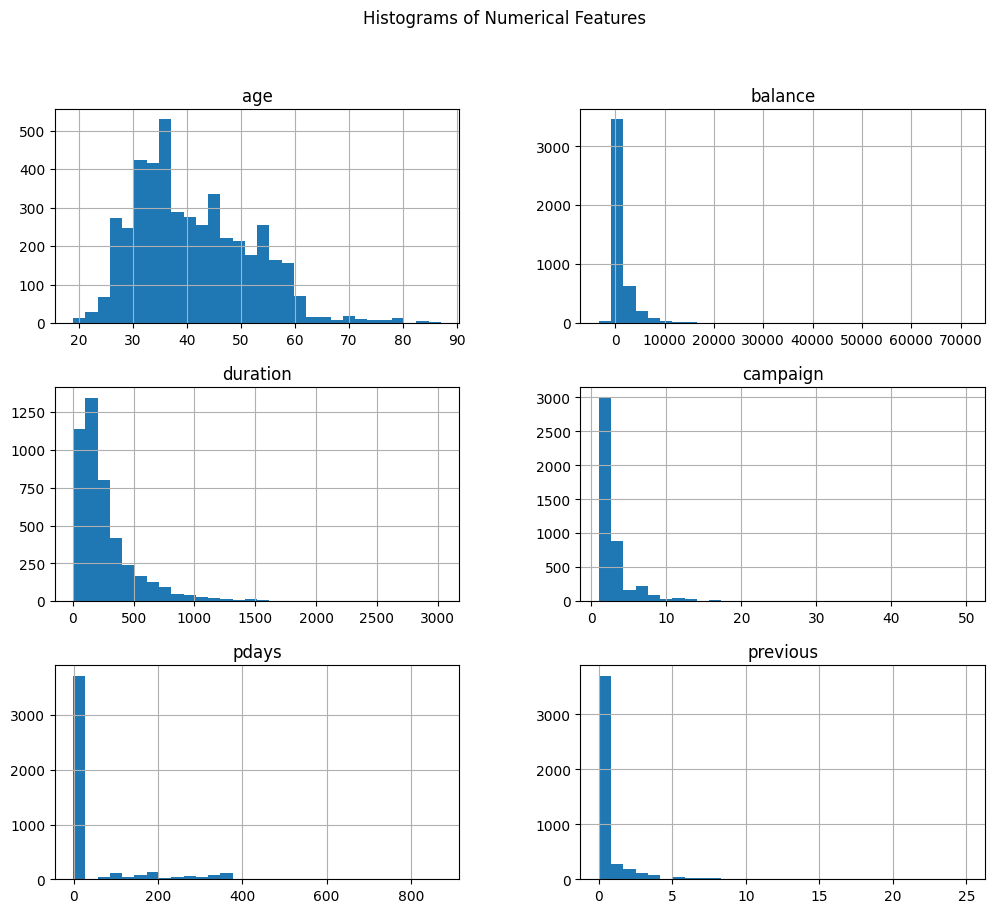

In [10]:
# Histograms for numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[numerical_features].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

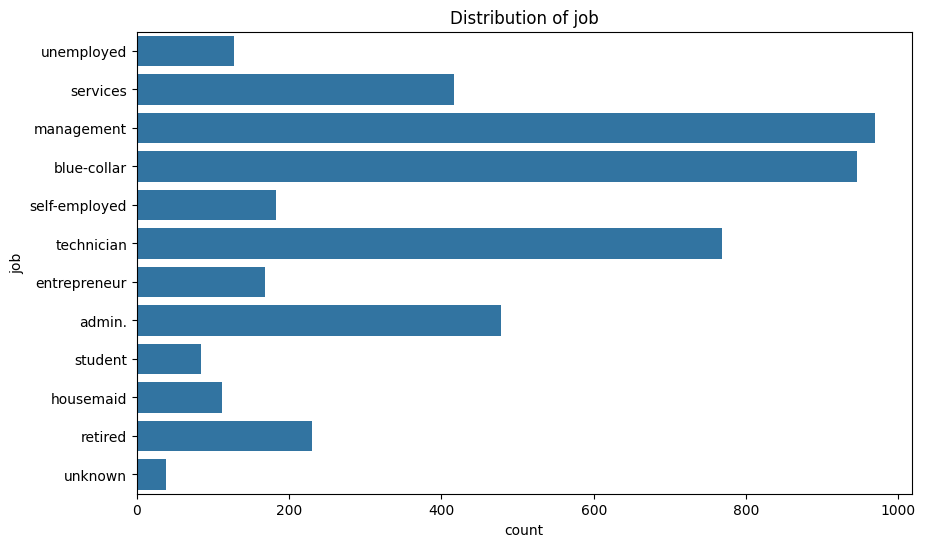

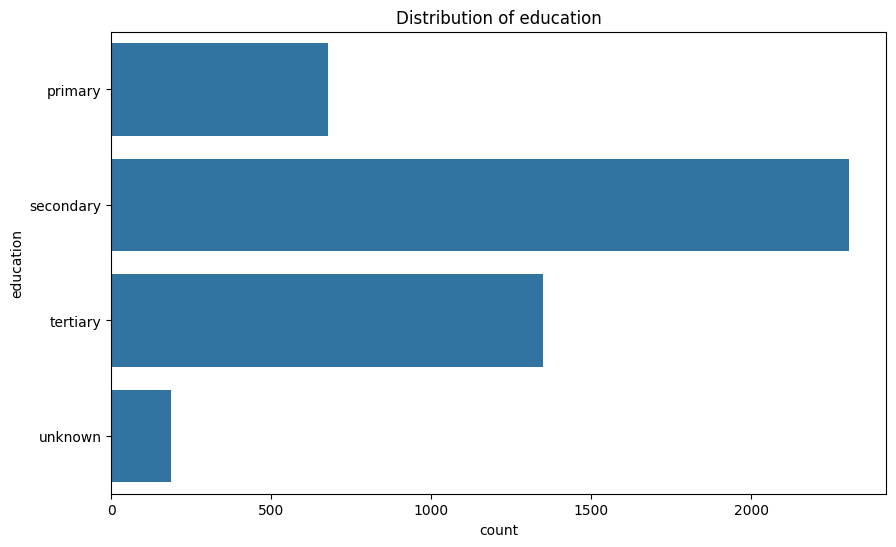

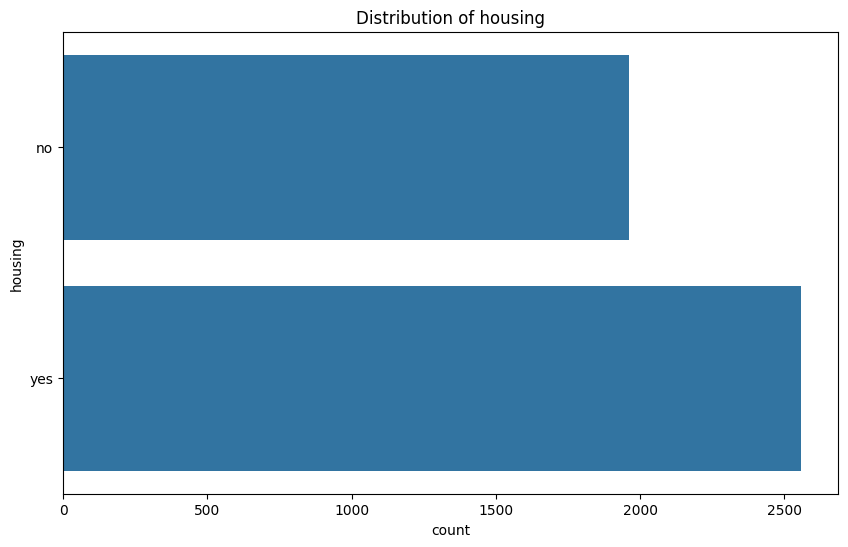

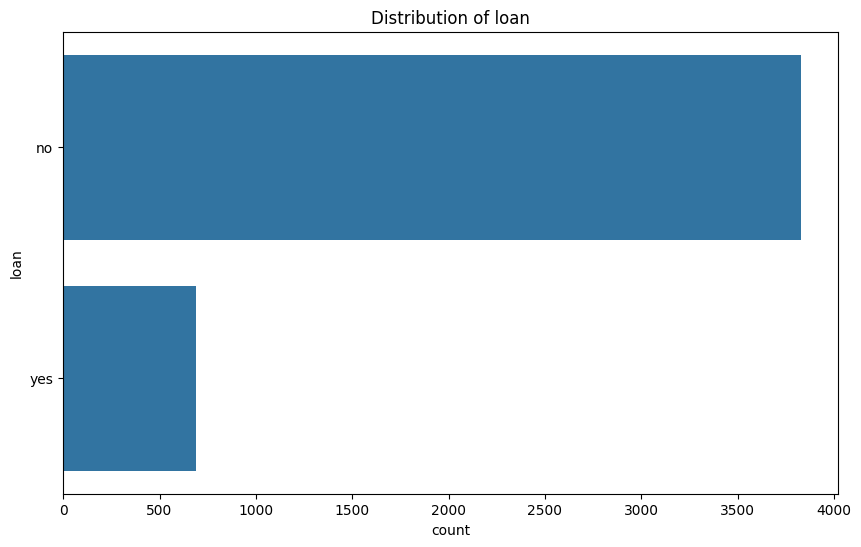

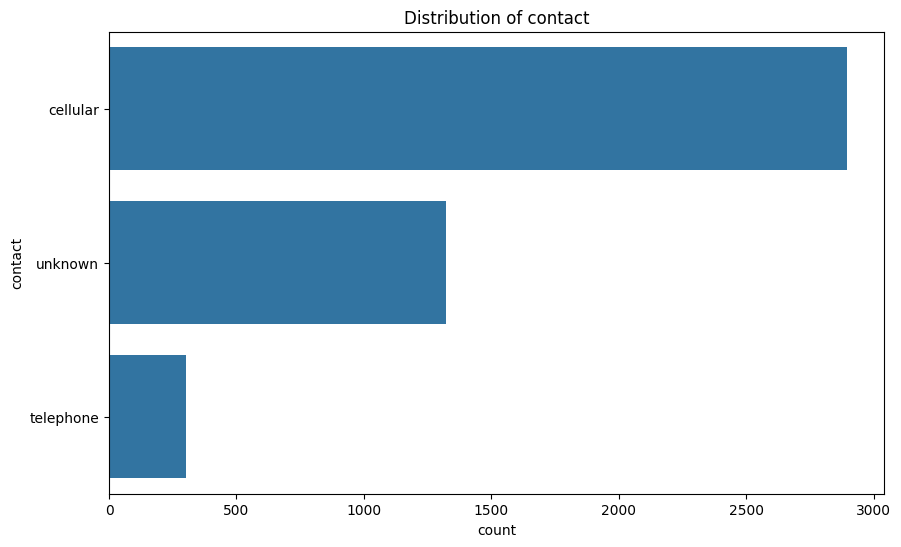

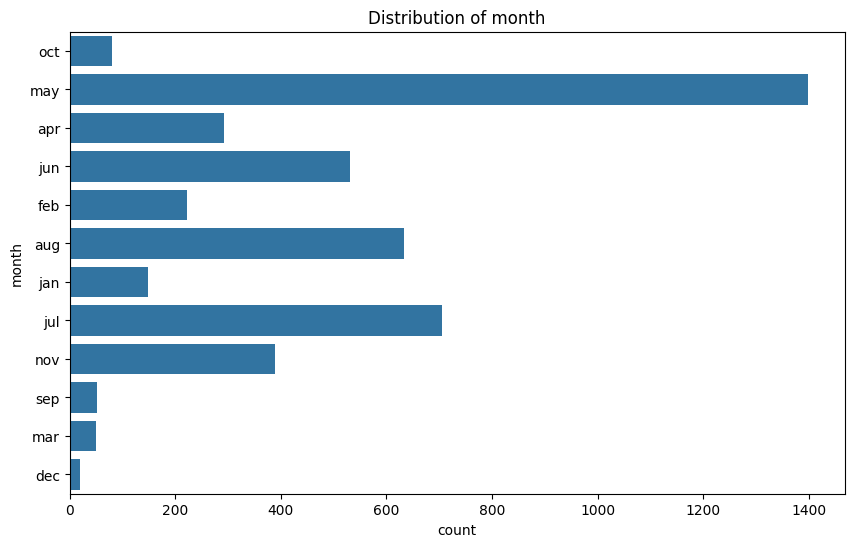

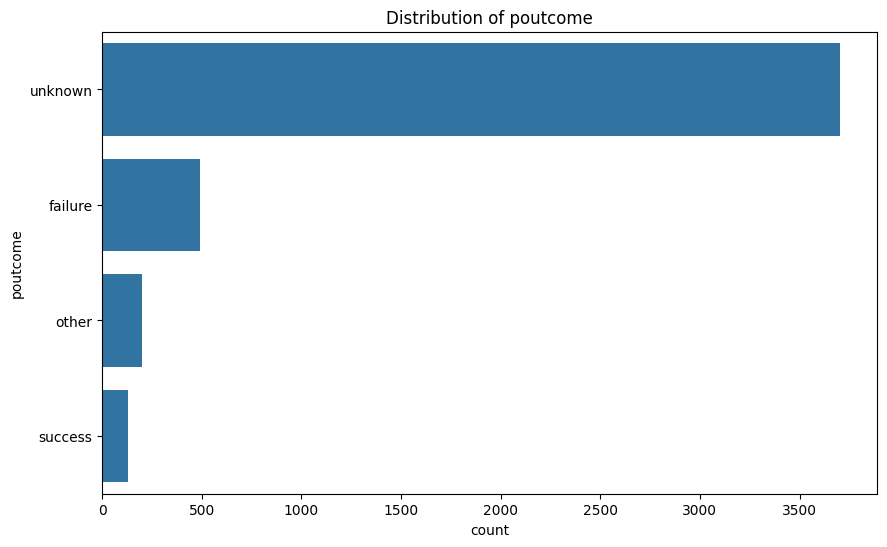

In [11]:
# Bar charts for categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.show()

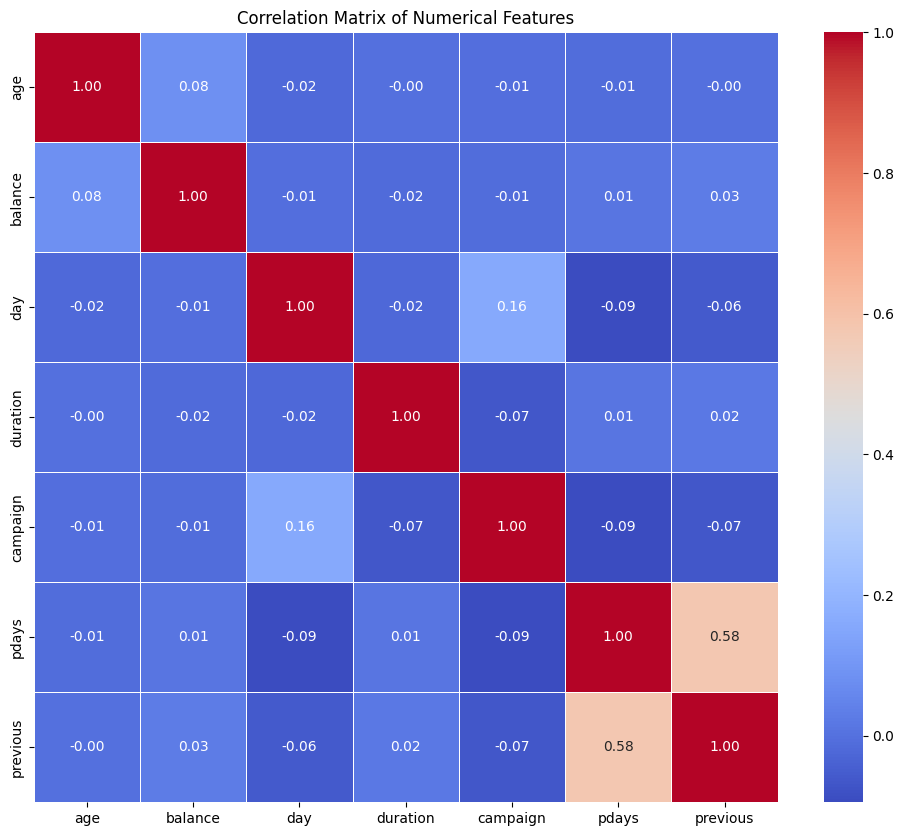

In [34]:


# Select only numerical columns
numerical_df = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('images/correlation_matrix.png')  # Save the heatmap as an image
plt.show()

# Calculate the correlation with the target variable
if 'y' in numerical_df.columns:
    target_corr = numerical_df.corr()['y'].drop('y')
else:
    target_corr = pd.Series()  # Empty series if 'y' is not in numerical_df

Understanding the relationships between numerical features helps in feature selection and improving model performance. Below, we provide a detailed analysis of the correlations within the dataset.

## Data Preprocessing

### Handling Missing Values

In [12]:
# Check for missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
# Data preprocessing: encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [16]:
# Verify changes
print("\nPreprocessed Data Sample:")
print(data_encoded.head())


Preprocessed Data Sample:
        age   balance  day  duration  campaign     pdays  previous  \
0 -1.056270  0.121072   19 -0.711861 -0.576829 -0.407218 -0.320413   
1 -0.772583  1.118644   11 -0.169194 -0.576829  2.989044  2.041734   
2 -0.583458 -0.024144   16 -0.303898 -0.576829  2.899143  0.270124   
3 -1.056270  0.017726    3 -0.250017  0.387967 -0.407218 -0.320413   
4  1.686036 -0.472753    5 -0.146102 -0.576829 -0.407218 -0.320413   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False             False          False  ...      False   
3            False             False          False  ...       True   
4             True             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False      False      False       True    

---

## Methodology

### Model Selection and Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into features and target variable
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.898305   0.581395  0.328947  0.420168
Decision Tree           0.863670   0.393548  0.401316  0.397394
Random Forest           0.898305   0.616667  0.243421  0.349057
Gradient Boosting       0.895357   0.554348  0.335526  0.418033
Support Vector Machine  0.887988   0.000000  0.000000  0.000000


c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Model Refinement

In [20]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:")
print(grid_search.best_params_)
print("Best F1 Score:")
print(grid_search.best_score_)

Best Parameters for Random Forest:
{'max_depth': 20, 'n_estimators': 50}
Best F1 Score:
0.37585558429768107


## Results

### Model Evaluation and Validation

In [21]:
# Cross-validation example
from sklearn.model_selection import cross_val_score

cross_val_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    cross_val_scores[name] = scores.mean()

# Display cross-validation results
print("\nCross-Validation Scores:")
print(pd.Series(cross_val_scores))


Cross-Validation Scores:
Logistic Regression       0.423549
Decision Tree             0.437641
Random Forest             0.365195
Gradient Boosting         0.455303
Support Vector Machine    0.000000
dtype: float64


## Justification

In [22]:
log_reg_results = {
    'Accuracy': 0.898305,
    'Precision': 0.581395,
    'Recall': 0.328947,
    'F1 Score': 0.420168
}
print("Logistic Regression Performance:")
print(log_reg_results)

Logistic Regression Performance:
{'Accuracy': 0.898305, 'Precision': 0.581395, 'Recall': 0.328947, 'F1 Score': 0.420168}


**Analysis:**
Logistic Regression achieves the highest accuracy among all models, suggesting it correctly classifies a large proportion of instances. However, its precision and recall values indicate it struggles with correctly identifying positive cases (clients who will subscribe to the term deposit), resulting in a relatively low F1 Score. This implies that while Logistic Regression is good at general classification, it may not be the best at handling the imbalance in the target variable.

In [23]:
# Results for Decision Tree
decision_tree_results = {
    'Accuracy': 0.863670,
    'Precision': 0.393548,
    'Recall': 0.401316,
    'F1 Score': 0.397394
}
print("Decision Tree Performance:")
print(decision_tree_results)

Decision Tree Performance:
{'Accuracy': 0.86367, 'Precision': 0.393548, 'Recall': 0.401316, 'F1 Score': 0.397394}


**Analysis:**
The Decision Tree model performs reasonably well in terms of accuracy but shows lower precision and recall compared to Logistic Regression. This model's performance suggests that it might overfit to the training data, which can lead to suboptimal generalization to new data. The F1 Score is also relatively low, indicating that it balances precision and recall poorly.

In [24]:
# Results for Random Forest
random_forest_results = {
    'Accuracy': 0.898305,
    'Precision': 0.616667,
    'Recall': 0.243421,
    'F1 Score': 0.349057
}
print("Random Forest Performance:")
print(random_forest_results)

Random Forest Performance:
{'Accuracy': 0.898305, 'Precision': 0.616667, 'Recall': 0.243421, 'F1 Score': 0.349057}


**Analysis:**
Random Forest achieves the same accuracy as Logistic Regression but has a higher precision. However, its low recall indicates that it fails to identify a significant portion of positive cases. The F1 Score is lower than that of Logistic Regression, highlighting that Random Forest might be more biased towards negative predictions. This suggests potential overfitting or insufficient parameter tuning.

In [25]:
# Results for Support Vector Machine
svm_results = {
    'Accuracy': 0.887988,
    'Precision': 0.000000,
    'Recall': 0.000000,
    'F1 Score': 0.000000
}
print("Support Vector Machine Performance:")
print(svm_results)

Support Vector Machine Performance:
{'Accuracy': 0.887988, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}


**Analysis:**
The SVM model performs poorly across all metrics, with an accuracy only slightly lower than the other models but with zero precision, recall, and F1 Score for positive cases. This indicates that SVM may not be well-suited for this dataset or that its parameters are not properly tuned. This could be due to the model's difficulty handling the imbalance or other dataset-specific issues.

### Best Parameters for Random Forest

In [27]:
# Best Parameters and F1 Score for Random Forest
best_rf_params = {'max_depth': 20, 'n_estimators': 50}
best_rf_f1_score = 0.37585558429768107

print("Best Parameters for Random Forest:")
print(best_rf_params)
print("Best F1 Score:")
print(best_rf_f1_score)

Best Parameters for Random Forest:
{'max_depth': 20, 'n_estimators': 50}
Best F1 Score:
0.37585558429768107


**Analysis:**
The Random Forest model's best parameters suggest a moderate complexity and depth for the trees in the forest. While these parameters have improved the F1 Score from the initial model, the score remains lower compared to other models like Logistic Regression and Gradient Boosting. This suggests that while tuning has had some positive effect, the Random Forest still faces challenges in effectively balancing precision and recall.

### Cross-Validation Scores

In [28]:
# Cross-Validation Scores
cross_val_scores = {
    'Logistic Regression': 0.423549,
    'Decision Tree': 0.437641,
    'Random Forest': 0.365195,
    'Gradient Boosting': 0.455303,
    'Support Vector Machine': 0.000000
}
print("Cross-Validation Scores:")
print(pd.Series(cross_val_scores))

Cross-Validation Scores:
Logistic Regression       0.423549
Decision Tree             0.437641
Random Forest             0.365195
Gradient Boosting         0.455303
Support Vector Machine    0.000000
dtype: float64


**Analysis:**
The cross-validation scores reveal that Gradient Boosting performs best, suggesting it is the most consistent model across different subsets of the data. Logistic Regression and Decision Tree follow, with Random Forest showing lower cross-validation scores, which could indicate overfitting or less robust performance on unseen data. The SVMâ€™s cross-validation score of 0.0000 corroborates its poor performance metrics and suggests significant issues with this model.

### Summary

1. Gradient Boosting appears to be the most promising model based on cross-validation scores, despite its slightly lower F1 Score compared to Logistic Regression.
2. Logistic Regression achieves high accuracy and better performance in terms of precision and F1 Score but struggles with recall.
3. Random Forest and Decision Tree show potential but have lower F1 Scores and inconsistent performance.
4. SVM performs poorly across all metrics and requires further investigation or tuning.

### Future Work

1. Further tuning of model parameters.
2. Exploring additional features.
3. Addressing class imbalance through techniques such as SMOTE (Synthetic Minority Over-sampling Technique).

## Conclusion

### Reflection

The goal of this project was to predict whether a client would subscribe to a term deposit based on various attributes from a banking dataset. After exploring and preprocessing the data, several machine learning models were applied, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Machine (SVM). 

**Key Findings:**
1. **Logistic Regression** demonstrated the highest accuracy and a balanced performance in terms of precision and F1 Score. Despite its good performance, it struggled with recall, indicating it missed a significant number of positive cases.
2. **Gradient Boosting** showed strong performance in cross-validation, suggesting it is more robust to unseen data. It also provided a competitive F1 Score but still had limitations in recall.
3. **Random Forest** achieved similar accuracy to Logistic Regression but had a lower F1 Score, pointing to possible overfitting or parameter tuning issues.
4. **Decision Tree** performed reasonably well but with lower precision and recall compared to other models.
5. **SVM** performed poorly across all metrics, indicating it was not suitable for this dataset or required significant parameter adjustments.

Overall, while Gradient Boosting emerged as the most consistent model across cross-validation, improvements in recall and overall predictive performance are necessary. The project's results underscore the importance of balancing precision and recall in classification tasks, particularly in cases with imbalanced datasets.

### Improvement

**1. Addressing Class Imbalance:**
   - The dataset is imbalanced, with a higher number of non-subscribers compared to subscribers. Techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or **undersampling**